In [1]:
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense, Dropout, LayerNormalization, LSTM, Conv1D, MaxPooling1D, Flatten, TimeDistributed, InputLayer
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

import time

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# LSTM

In [3]:
# Convert DataFrame to NumPy array and reshape it
X_train_reshaped = X_train.values.reshape(-1, 1, 28)  # Reshape to [samples, timesteps, features]
X_test_reshaped = X_test.values.reshape(-1, 1, 28)

## 1 layer

In [43]:
def create_lstm_model_1l(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape))  # Only one LSTM layer
    model.add(Dense(1))  # Output layer
    return model

In [44]:
K.clear_session()

# Set up the optimizer with the specified parameters
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

input_shape = (1, 28)

# Create the model
model_1l = create_lstm_model_1l(input_shape)

# Compile the model
model_1l.compile(optimizer=optimizer, loss='mean_squared_error')

# Summary of the model
model_1l.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               80384     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 80,513
Trainable params: 80,513
Non-trainable params: 0
_________________________________________________________________


In [45]:
start_time = time.time()

LSTM_1l = model_1l.fit(X_train_reshaped, y_train, epochs=50, batch_size=256, validation_data=(X_test_reshaped, y_test))

end_time = time.time()

Epoch 1/50
274/274 [==============================] - 2s 5ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 2/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 3/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 6/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 9/50
274/274 [==============================] - 1s 4ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 10/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0011

In [46]:
exetime_LSTM_1l = end_time-start_time
exetime_LSTM_1l

48.850172996520996

In [48]:
# Evaluate the model on the test data
test_loss_LSTM_1l = model_1l.evaluate(X_test_reshaped, y_test)
test_loss_LSTM_1l

938/938 [==============================] - 2s 2ms/step - loss: 5.9960e-04


0.0005996013060212135

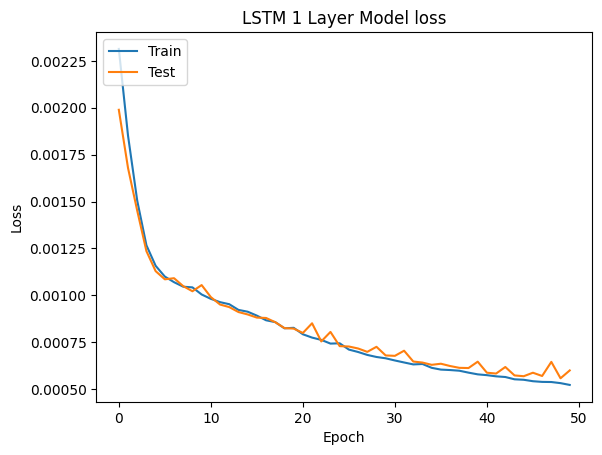

In [49]:
# Plot training & validation loss values
plt.plot(LSTM_1l.history['loss'])
plt.plot(LSTM_1l.history['val_loss'])
plt.title('LSTM 1 Layer Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 3 Layer

In [50]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(128))
    model.add(Dense(1))

    return model

In [51]:
K.clear_session()

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
input_shape = (1, 28)
model = create_lstm_model(input_shape)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            80384     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 128)            131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 343,681
Trainable params: 343,681
Non-trainable params: 0
_________________________________________________________________


In [52]:
start_time = time.time()

LSTM_3l = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=256, validation_data=(X_test_reshaped, y_test))

end_time = time.time()

Epoch 1/50
274/274 [==============================] - 54s 10ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 2/50
274/274 [==============================] - 2s 7ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/50
274/274 [==============================] - 2s 7ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/50
274/274 [==============================] - 2s 7ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/50
274/274 [==============================] - 2s 7ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 6/50
274/274 [==============================] - 2s 6ms/step - loss: 9.6749e-04 - val_loss: 9.2013e-04
Epoch 7/50
274/274 [==============================] - 2s 6ms/step - loss: 9.3984e-04 - val_loss: 8.9054e-04
Epoch 8/50
274/274 [==============================] - 2s 6ms/step - loss: 8.9950e-04 - val_loss: 9.6889e-04
Epoch 9/50
274/274 [==============================] - 2s 6ms/step - loss: 8.8626e-04 - val_loss: 8.7346e-04
Epoch 10/50
274/274 [==============================] - 2s 6ms/step

In [53]:
exetime_LSTM_3l = end_time-start_time
exetime_LSTM_3l

140.63934016227722

In [54]:
test_loss_LSTM_3l = model.evaluate(X_test_reshaped, y_test)
test_loss_LSTM_3l

938/938 [==============================] - 2s 2ms/step - loss: 4.5945e-04


0.0004594487545546144

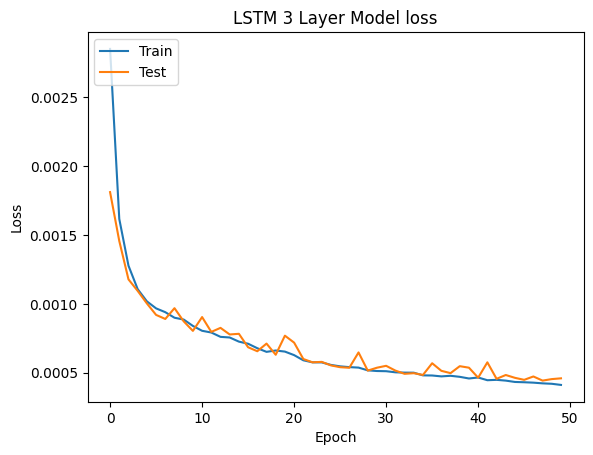

In [55]:
plt.plot(LSTM_3l.history['loss'])
plt.plot(LSTM_3l.history['val_loss'])
plt.title('LSTM 3 Layer Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 5 Layer

In [56]:
def create_lstm_model_5l(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))  # First layer, must return sequences
    model.add(LSTM(128, return_sequences=True))  # Second layer
    model.add(LSTM(128, return_sequences=True))  # Third layer
    model.add(LSTM(128, return_sequences=True))  # Fourth layer
    model.add(LSTM(128))  # Fifth layer, does not return sequences
    model.add(Dense(1))  # Output layer
    return model

In [57]:
K.clear_session()

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
input_shape = (1, 28)
model_5l = create_lstm_model_5l(input_shape)
model_5l.compile(optimizer=optimizer, loss='mean_squared_error')

model_5l.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            80384     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 128)            131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 128)            131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 128)            131584    
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 606,849
Trainable params: 606,849
Non-trainable params: 0
__________________________________________________

In [58]:
start_time = time.time()

LSTM_5l = model_5l.fit(X_train_reshaped, y_train, epochs=50, batch_size=256, validation_data=(X_test_reshaped, y_test))

end_time = time.time()

Epoch 1/50
274/274 [==============================] - 8s 14ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 2/50
274/274 [==============================] - 3s 9ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/50
274/274 [==============================] - 3s 9ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 4/50
274/274 [==============================] - 3s 9ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/50
274/274 [==============================] - 3s 9ms/step - loss: 9.7756e-04 - val_loss: 9.2448e-04
Epoch 6/50
274/274 [==============================] - 3s 9ms/step - loss: 9.4791e-04 - val_loss: 9.2565e-04
Epoch 7/50
274/274 [==============================] - 3s 10ms/step - loss: 9.2285e-04 - val_loss: 9.0750e-04
Epoch 8/50
274/274 [==============================] - 3s 10ms/step - loss: 8.8638e-04 - val_loss: 8.8061e-04
Epoch 9/50
274/274 [==============================] - 3s 9ms/step - loss: 8.5245e-04 - val_loss: 9.0889e-04
Epoch 10/50
274/274 [==============================] - 3s

In [59]:
exetime_LSTM_5l = end_time-start_time
exetime_LSTM_5l

135.59187769889832

In [60]:
test_loss_LSTM_5l = model_5l.evaluate(X_test_reshaped, y_test)
test_loss_LSTM_5l

938/938 [==============================] - 3s 3ms/step - loss: 4.2774e-04


0.0004277409752830863

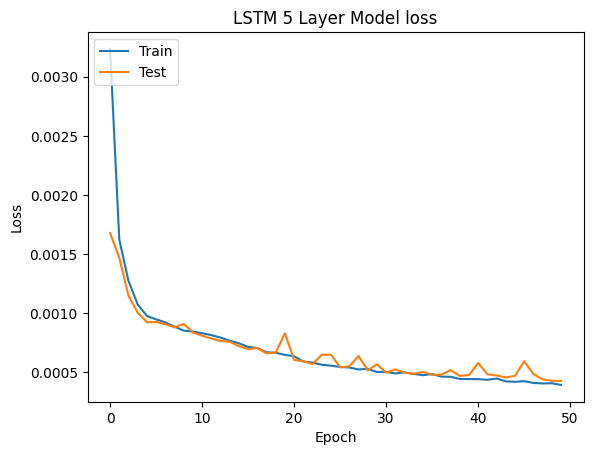

In [61]:
plt.plot(LSTM_5l.history['loss'])
plt.plot(LSTM_5l.history['val_loss'])
plt.title('LSTM 5 Layer Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# DNN

In [3]:
input_dim = 28
output_dim = 1

In [4]:
arr_X_train = X_train.values
arr_X_test = X_test.values
arr_y_train = y_train.values
arr_y_test = y_test.values

## 1 Layer

In [64]:
K.clear_session()

model = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dense(output_dim)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                928       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [65]:
start_time = time.time()

DNN_1l = model.fit(arr_X_train, arr_y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test))

end_time = time.time()

Epoch 1/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0759 - mean_absolute_error: 0.1668 - val_loss: 0.0060 - val_mean_absolute_error: 0.0597
Epoch 2/50
274/274 [==============================] - 1s 2ms/step - loss: 0.0049 - mean_absolute_error: 0.0536 - val_loss: 0.0043 - val_mean_absolute_error: 0.0495
Epoch 3/50
274/274 [==============================] - 1s 2ms/step - loss: 0.0039 - mean_absolute_error: 0.0472 - val_loss: 0.0036 - val_mean_absolute_error: 0.0451
Epoch 4/50
274/274 [==============================] - 1s 2ms/step - loss: 0.0033 - mean_absolute_error: 0.0431 - val_loss: 0.0031 - val_mean_absolute_error: 0.0414
Epoch 5/50
274/274 [==============================] - 1s 2ms/step - loss: 0.0029 - mean_absolute_error: 0.0400 - val_loss: 0.0028 - val_mean_absolute_error: 0.0385
Epoch 6/50
274/274 [==============================] - 1s 2ms/step - loss: 0.0026 - mean_absolute_error: 0.0375 - val_loss: 0.0025 - val_mean_absolute_error: 0.0359
Epoch 7/50
274/2

In [66]:
exetime_DNN_1l = end_time-start_time
exetime_DNN_1l

32.234848737716675

In [67]:
test_loss_DNN_1l, test_accuracy_DNN_1l = model.evaluate(arr_X_test, arr_y_test)
test_loss_DNN_1l, test_accuracy_DNN_1l

938/938 [==============================] - 1s 2ms/step - loss: 0.0011 - mean_absolute_error: 0.0214


(0.001078184344805777, 0.02141604572534561)

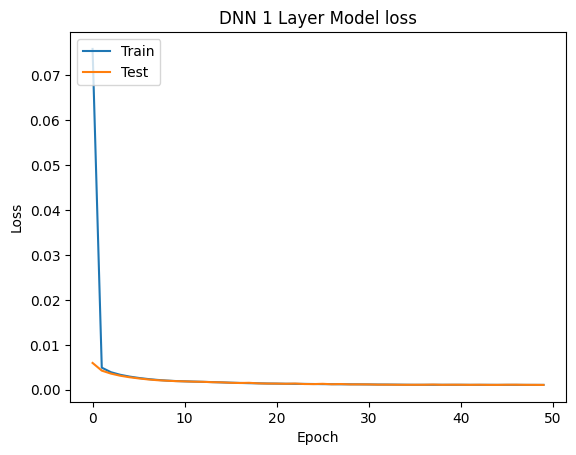

In [68]:
plt.plot(DNN_1l.history['loss'])
plt.plot(DNN_1l.history['val_loss'])
plt.title('DNN 1 Layer Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 3 Layer

In [69]:
K.clear_session()

model = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(output_dim)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                928       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [70]:
start_time = time.time()

DNN_3l = model.fit(arr_X_train, arr_y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test))

end_time = time.time()

Epoch 1/50
274/274 [==============================] - 1s 4ms/step - loss: 0.0031 - mean_absolute_error: 0.0387 - val_loss: 0.0021 - val_mean_absolute_error: 0.0306
Epoch 2/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0018 - mean_absolute_error: 0.0286 - val_loss: 0.0016 - val_mean_absolute_error: 0.0269
Epoch 3/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0016 - mean_absolute_error: 0.0267 - val_loss: 0.0015 - val_mean_absolute_error: 0.0259
Epoch 4/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0014 - mean_absolute_error: 0.0255 - val_loss: 0.0013 - val_mean_absolute_error: 0.0240
Epoch 5/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0012 - mean_absolute_error: 0.0236 - val_loss: 0.0012 - val_mean_absolute_error: 0.0228
Epoch 6/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0012 - mean_absolute_error: 0.0229 - val_loss: 0.0012 - val_mean_absolute_error: 0.0224
Epoch 7/50
274/2

Epoch 49/50
274/274 [==============================] - 1s 3ms/step - loss: 4.0268e-04 - mean_absolute_error: 0.0137 - val_loss: 4.7040e-04 - val_mean_absolute_error: 0.0142
Epoch 50/50
274/274 [==============================] - 1s 3ms/step - loss: 3.9391e-04 - mean_absolute_error: 0.0136 - val_loss: 4.4835e-04 - val_mean_absolute_error: 0.0139


In [71]:
exetime_DNN_3l = end_time-start_time
exetime_DNN_3l

38.22447395324707

In [72]:
test_loss_DNN_3l, test_accuracy_DNN_3l = model.evaluate(arr_X_test, arr_y_test)
test_loss_DNN_3l, test_accuracy_DNN_3l

938/938 [==============================] - 2s 2ms/step - loss: 4.4835e-04 - mean_absolute_error: 0.0139


(0.0004483484080992639, 0.013947678729891777)

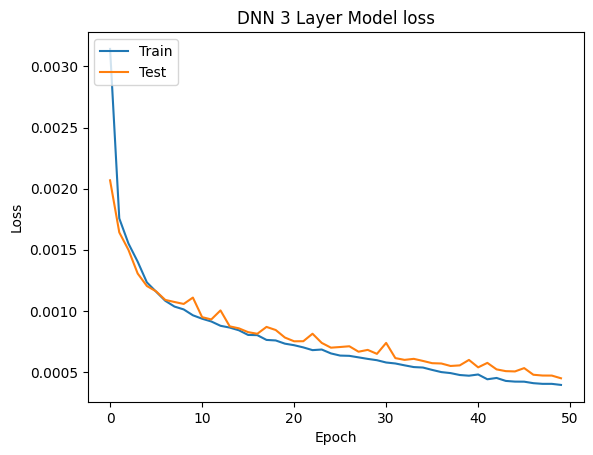

In [73]:
plt.plot(DNN_3l.history['loss'])
plt.plot(DNN_3l.history['val_loss'])
plt.title('DNN 3 Layer Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 5 Layer

In [5]:
K.clear_session()

model = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(output_dim)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                928       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 21,729
Trainable params: 21,729
Non-trainable params: 0
____________________________________________________

In [6]:
start_time = time.time()

DNN_5l = model.fit(arr_X_train, arr_y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test))

end_time = time.time()

Epoch 1/50
274/274 [==============================] - 3s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0352 - val_loss: 0.0017 - val_mean_absolute_error: 0.0276
Epoch 2/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0015 - mean_absolute_error: 0.0256 - val_loss: 0.0013 - val_mean_absolute_error: 0.0234
Epoch 3/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0012 - mean_absolute_error: 0.0231 - val_loss: 0.0011 - val_mean_absolute_error: 0.0221
Epoch 4/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0011 - mean_absolute_error: 0.0218 - val_loss: 0.0012 - val_mean_absolute_error: 0.0216
Epoch 5/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0010 - mean_absolute_error: 0.0209 - val_loss: 0.0011 - val_mean_absolute_error: 0.0218
Epoch 6/50
274/274 [==============================] - 1s 3ms/step - loss: 9.2924e-04 - mean_absolute_error: 0.0199 - val_loss: 9.8623e-04 - val_mean_absolute_error: 0.0209
Epoch 7/

Epoch 49/50
274/274 [==============================] - 1s 3ms/step - loss: 2.3843e-04 - mean_absolute_error: 0.0108 - val_loss: 3.7826e-04 - val_mean_absolute_error: 0.0123
Epoch 50/50
274/274 [==============================] - 1s 3ms/step - loss: 2.3771e-04 - mean_absolute_error: 0.0108 - val_loss: 4.0989e-04 - val_mean_absolute_error: 0.0127


In [7]:
exetime_DNN_5l = end_time-start_time
exetime_DNN_5l

42.704492807388306

In [76]:
test_loss_DNN_5l, test_accuracy_DNN_5l = model.evaluate(arr_X_test, arr_y_test)
test_loss_DNN_5l, test_accuracy_DNN_5l

938/938 [==============================] - 2s 2ms/step - loss: 3.7606e-04 - mean_absolute_error: 0.0124


(0.00037606150726787746, 0.01243746280670166)

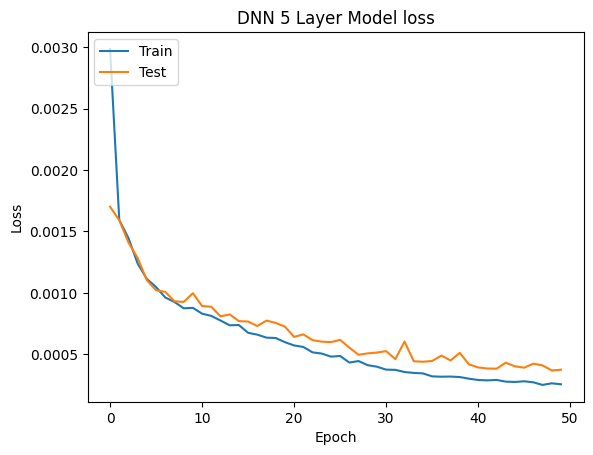

In [77]:
plt.plot(DNN_5l.history['loss'])
plt.plot(DNN_5l.history['val_loss'])
plt.title('DNN 5 Layer Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# CNN

In [78]:
X_train_CNN = arr_X_train.reshape((X_train.shape[0], 1, 28))
X_test_CNN = arr_X_test.reshape((X_test.shape[0], 1, 28))
y_train_CNN = arr_y_train
y_test_CNN = arr_y_test

## 1 Layer

In [108]:
K.clear_session()

model = Sequential([
    Conv1D(128, 1, activation='relu', input_shape=(1, 28)),
    MaxPooling1D(1),
    MaxPooling1D(1),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 128)            3712      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 128)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 20,353
Trainable params: 20,353
Non-trainable params: 0
____________________________________________________

In [91]:
start_time = time.time()

CNN_1l = model.fit(X_train_CNN, y_train_CNN, epochs=50, batch_size=256, validation_data=(X_test_CNN, y_test_CNN))

end_time = time.time()

Epoch 1/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 2/50
274/274 [==============================] - 1s 2ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/50
274/274 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/50
274/274 [==============================] - 1s 3ms/step - loss: 9.6032e-04 - val_loss: 9.7270e-04
Epoch 5/50
274/274 [==============================] - 1s 3ms/step - loss: 8.7057e-04 - val_loss: 9.0201e-04
Epoch 6/50
274/274 [==============================] - 1s 3ms/step - loss: 8.0335e-04 - val_loss: 8.6087e-04
Epoch 7/50
274/274 [==============================] - 1s 3ms/step - loss: 7.5086e-04 - val_loss: 7.8345e-04
Epoch 8/50
274/274 [==============================] - 1s 3ms/step - loss: 6.9119e-04 - val_loss: 7.3395e-04
Epoch 9/50
274/274 [==============================] - 1s 3ms/step - loss: 6.6054e-04 - val_loss: 7.4907e-04
Epoch 10/50
274/274 [==============================]

In [92]:
exetime_CNN_1l = end_time-start_time
exetime_CNN_1l

39.27196264266968

In [83]:
test_loss_CNN_1l = model.evaluate(X_test_CNN, y_test_CNN)
test_loss_CNN_1l

938/938 [==============================] - 1s 1ms/step - loss: 3.0368e-04


0.0003036817943211645

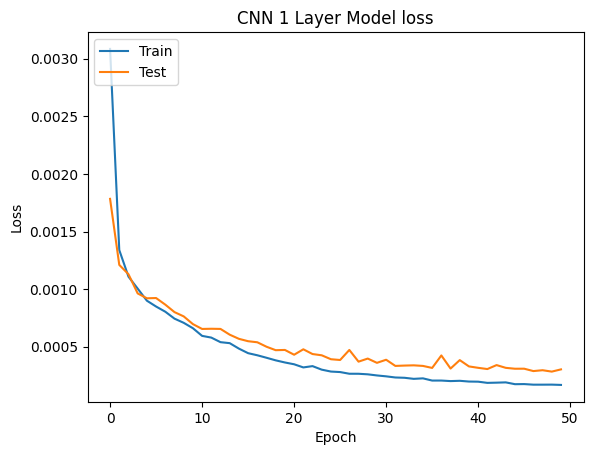

In [84]:
plt.plot(CNN_1l.history['loss'])
plt.plot(CNN_1l.history['val_loss'])
plt.title('CNN 1 Layer Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 3 Layer

In [109]:
K.clear_session()

model = Sequential([
    Conv1D(128, 1, activation='relu', input_shape=(1, 28)),
    MaxPooling1D(1),
    Conv1D(128, 1, activation='relu'),
    MaxPooling1D(1),
    Conv1D(128, 1, activation='relu'),
    MaxPooling1D(1),
    MaxPooling1D(1),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 128)            3712      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 128)            16512     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 128)            16512     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 128)            0

In [86]:
start_time = time.time()

CNN_3l = model.fit(X_train_CNN, y_train_CNN, epochs=50, batch_size=256, validation_data=(X_test_CNN, y_test_CNN))

end_time = time.time()

Epoch 1/50
274/274 [==============================] - 2s 5ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 2/50
274/274 [==============================] - 1s 4ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 3/50
274/274 [==============================] - 1s 4ms/step - loss: 9.3088e-04 - val_loss: 8.6999e-04
Epoch 4/50
274/274 [==============================] - 1s 4ms/step - loss: 8.3610e-04 - val_loss: 8.5734e-04
Epoch 5/50
274/274 [==============================] - 1s 4ms/step - loss: 7.4824e-04 - val_loss: 7.7645e-04
Epoch 6/50
274/274 [==============================] - 1s 4ms/step - loss: 6.9680e-04 - val_loss: 8.4620e-04
Epoch 7/50
274/274 [==============================] - 1s 4ms/step - loss: 6.3581e-04 - val_loss: 6.5688e-04
Epoch 8/50
274/274 [==============================] - 1s 4ms/step - loss: 5.5678e-04 - val_loss: 6.2032e-04
Epoch 9/50
274/274 [==============================] - 1s 4ms/step - loss: 5.1837e-04 - val_loss: 5.5814e-04
Epoch 10/50
274/274 [=======================

In [87]:
exetime_CNN_3l = end_time-start_time
exetime_CNN_3l

51.690046548843384

In [88]:
test_loss_CNN_3l = model.evaluate(X_test_CNN, y_test_CNN)
test_loss_CNN_3l

938/938 [==============================] - 1s 2ms/step - loss: 2.7548e-04


0.00027547997888177633

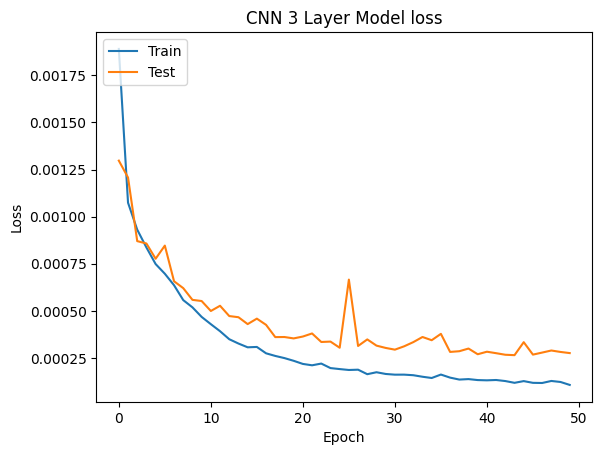

In [89]:
plt.plot(CNN_3l.history['loss'])
plt.plot(CNN_3l.history['val_loss'])
plt.title('CNN 3 Layer Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 5 Layer

In [110]:
K.clear_session()

model = Sequential([
    Conv1D(128, 1, activation='relu', input_shape=(1, 28)),
    MaxPooling1D(1),
    Conv1D(128, 1, activation='relu'),
    MaxPooling1D(1),
    Conv1D(128, 1, activation='relu'),
    MaxPooling1D(1),
    Conv1D(128, 1, activation='relu'),
    MaxPooling1D(1),
    Conv1D(128, 1, activation='relu'),
    MaxPooling1D(1),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 128)            3712      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 128)            16512     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 128)            16512     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 128)            1

In [94]:
start_time = time.time()

CNN_5l = model.fit(X_train_CNN, y_train_CNN, epochs=50, batch_size=256, validation_data=(X_test_CNN, y_test_CNN))

end_time = time.time()

Epoch 1/50
274/274 [==============================] - 2s 6ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 2/50
274/274 [==============================] - 1s 5ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 3/50
274/274 [==============================] - 1s 5ms/step - loss: 9.2301e-04 - val_loss: 9.3084e-04
Epoch 4/50
274/274 [==============================] - 1s 5ms/step - loss: 8.2746e-04 - val_loss: 8.2355e-04
Epoch 5/50
274/274 [==============================] - 1s 5ms/step - loss: 7.4956e-04 - val_loss: 7.5151e-04
Epoch 6/50
274/274 [==============================] - 1s 5ms/step - loss: 6.9007e-04 - val_loss: 7.4864e-04
Epoch 7/50
274/274 [==============================] - 1s 5ms/step - loss: 6.1731e-04 - val_loss: 7.5247e-04
Epoch 8/50
274/274 [==============================] - 1s 5ms/step - loss: 5.8385e-04 - val_loss: 5.9564e-04
Epoch 9/50
274/274 [==============================] - 1s 5ms/step - loss: 5.3237e-04 - val_loss: 8.3151e-04
Epoch 10/50
274/274 [=======================

In [95]:
exetime_CNN_5l = end_time-start_time
exetime_CNN_5l

64.49780368804932

In [96]:
test_loss_CNN_5l = model.evaluate(X_test_CNN, y_test_CNN)
test_loss_CNN_5l

938/938 [==============================] - 2s 2ms/step - loss: 3.0323e-04


0.0003032329259440303

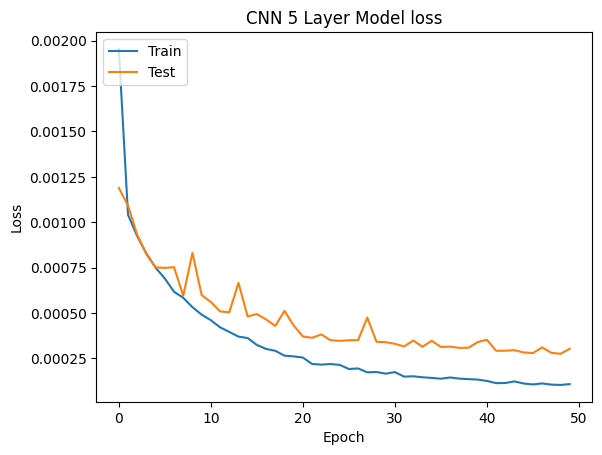

In [97]:
plt.plot(CNN_5l.history['loss'])
plt.plot(CNN_5l.history['val_loss'])
plt.title('CNN 5 Layer Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# CNN-LSTM

In [102]:
# transform np to arr
n_samples = X_train.shape[0]
n_features = 28
n_timesteps = 1

X_train_CL = arr_X_train.reshape((n_samples, n_timesteps, n_features, 1))
X_test_CL = arr_X_test.reshape((X_test.shape[0], n_timesteps, n_features, 1))
y_train_CL = arr_y_train
y_test_CL = arr_y_test

## 1 Layer

In [112]:
K.clear_session()

model1 = Sequential([
    InputLayer(input_shape=(n_timesteps, n_features, 1)),
    TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')),
    TimeDistributed(MaxPooling1D(pool_size=1)),
    TimeDistributed(Flatten()),
    LSTM(128, activation='tanh', return_sequences=False),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model1.compile(optimizer=optimizer, loss='mean_squared_error')

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 1, 28, 128)        256       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 28, 128)        0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 1, 3584)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               1901056   
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,901,441
Trainable params: 1,901,441
Non-trainable params: 0
_________________________________________________________________


In [103]:
start_time = time.time()

CL_1l = model1.fit(X_train_CL, y_train_CL, epochs=50, batch_size=256, validation_data=(X_test_CL, y_test_CL))

end_time = time.time()

Epoch 1/50
274/274 [==============================] - 4s 6ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 2/50
274/274 [==============================] - 1s 4ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 3/50
274/274 [==============================] - 1s 4ms/step - loss: 9.5901e-04 - val_loss: 9.5642e-04
Epoch 4/50
274/274 [==============================] - 1s 4ms/step - loss: 6.4060e-04 - val_loss: 6.0349e-04
Epoch 5/50
274/274 [==============================] - 1s 4ms/step - loss: 5.1556e-04 - val_loss: 4.8938e-04
Epoch 6/50
274/274 [==============================] - 1s 4ms/step - loss: 4.4953e-04 - val_loss: 4.1720e-04
Epoch 7/50
274/274 [==============================] - 1s 4ms/step - loss: 4.0223e-04 - val_loss: 3.9957e-04
Epoch 8/50
274/274 [==============================] - 1s 4ms/step - loss: 3.7567e-04 - val_loss: 3.6304e-04
Epoch 9/50
274/274 [==============================] - 1s 4ms/step - loss: 3.4875e-04 - val_loss: 3.4237e-04
Epoch 10/50
274/274 [=======================

In [104]:
exetime_CL_1l = end_time-start_time
exetime_CL_1l

59.89975142478943

In [105]:
test_loss_CL_1l = model1.evaluate(X_test_CL, y_test_CL)
test_loss_CL_1l

938/938 [==============================] - 2s 2ms/step - loss: 1.7381e-04


0.00017381482757627964

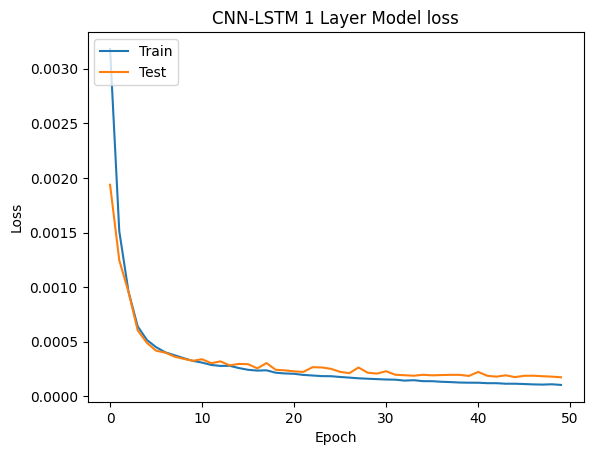

In [106]:
plt.plot(CL_1l.history['loss'])
plt.plot(CL_1l.history['val_loss'])
plt.title('CNN-LSTM 1 Layer Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 3 Layer

In [113]:
K.clear_session()

model1 = Sequential([
    InputLayer(input_shape=(n_timesteps, n_features, 1)),
    TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')),
    TimeDistributed(MaxPooling1D(pool_size=1)),
    TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')),
    TimeDistributed(MaxPooling1D(pool_size=1)),
    TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')),
    TimeDistributed(MaxPooling1D(pool_size=1)),
    TimeDistributed(Flatten()),
    LSTM(128, activation='tanh', return_sequences=True),
    LSTM(128, activation='tanh', return_sequences=True),
    LSTM(128, activation='tanh'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model1.compile(optimizer=optimizer, loss='mean_squared_error')

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 1, 28, 128)        256       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 28, 128)        0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 1, 28, 128)        16512     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 1, 28, 128)        0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 1, 28, 128)        16512     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 1, 28, 128)        0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 1, 3584)           0

In [114]:
start_time = time.time()

CL_3l = model1.fit(X_train_CL, y_train_CL, epochs=50, batch_size=256, validation_data=(X_test_CL, y_test_CL))

end_time = time.time()

Epoch 1/50
274/274 [==============================] - 7s 12ms/step - loss: 0.0024 - val_loss: 8.9095e-04
Epoch 2/50
274/274 [==============================] - 3s 9ms/step - loss: 7.3578e-04 - val_loss: 5.4718e-04
Epoch 3/50
274/274 [==============================] - 3s 9ms/step - loss: 4.7213e-04 - val_loss: 4.2833e-04
Epoch 4/50
274/274 [==============================] - 3s 9ms/step - loss: 3.6854e-04 - val_loss: 3.7420e-04
Epoch 5/50
274/274 [==============================] - 2s 9ms/step - loss: 3.1230e-04 - val_loss: 3.1517e-04
Epoch 6/50
274/274 [==============================] - 3s 9ms/step - loss: 2.8545e-04 - val_loss: 3.0786e-04
Epoch 7/50
274/274 [==============================] - 3s 10ms/step - loss: 2.4608e-04 - val_loss: 3.5294e-04
Epoch 8/50
274/274 [==============================] - 2s 9ms/step - loss: 2.2586e-04 - val_loss: 2.5053e-04
Epoch 9/50
274/274 [==============================] - 2s 9ms/step - loss: 2.0840e-04 - val_loss: 2.3043e-04
Epoch 10/50
274/274 [=========

In [115]:
exetime_CL_3l = end_time-start_time
exetime_CL_3l

129.71858191490173

In [116]:
test_loss_CL_3l = model1.evaluate(X_test_CL, y_test_CL)
test_loss_CL_3l

938/938 [==============================] - 3s 3ms/step - loss: 1.5730e-04


0.00015730131417512894

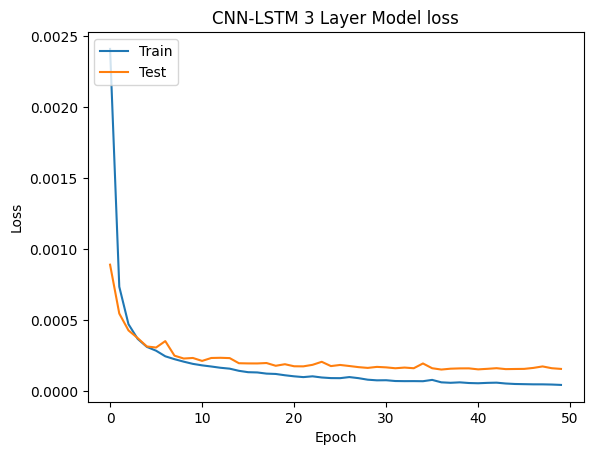

In [117]:
plt.plot(CL_3l.history['loss'])
plt.plot(CL_3l.history['val_loss'])
plt.title('CNN-LSTM 3 Layer Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 5 Layer

In [133]:
K.clear_session()

model1 = Sequential([
    InputLayer(input_shape=(n_timesteps, n_features, 1)),
    TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')),
    TimeDistributed(MaxPooling1D(pool_size=1)),
    TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')),
    TimeDistributed(MaxPooling1D(pool_size=1)),
    TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')),
    TimeDistributed(MaxPooling1D(pool_size=1)),
    TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')),
    TimeDistributed(MaxPooling1D(pool_size=1)),
    TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')),
    TimeDistributed(MaxPooling1D(pool_size=1)),
    TimeDistributed(Flatten()),
    LSTM(128, activation='tanh', return_sequences=True),
    LSTM(128, activation='tanh', return_sequences=True),
    LSTM(128, activation='tanh', return_sequences=True),
    LSTM(128, activation='tanh', return_sequences=True),
    LSTM(128, activation='tanh'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model1.compile(optimizer=optimizer, loss='mean_squared_error')

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 1, 28, 128)        256       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 28, 128)        0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 1, 28, 128)        16512     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 1, 28, 128)        0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 1, 28, 128)        16512     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 1, 28, 128)        0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 1, 28, 128)        1

In [134]:
start_time = time.time()

CL_5l = model1.fit(X_train_CL, y_train_CL, epochs=50, batch_size=256, validation_data=(X_test_CL, y_test_CL))

end_time = time.time()

Epoch 1/50
274/274 [==============================] - 10s 18ms/step - loss: 0.0045 - val_loss: 9.7863e-04
Epoch 2/50
274/274 [==============================] - 4s 13ms/step - loss: 6.8035e-04 - val_loss: 4.6908e-04
Epoch 3/50
274/274 [==============================] - 4s 14ms/step - loss: 4.1560e-04 - val_loss: 5.1018e-04
Epoch 4/50
274/274 [==============================] - 4s 14ms/step - loss: 3.5388e-04 - val_loss: 3.7034e-04
Epoch 5/50
274/274 [==============================] - 4s 14ms/step - loss: 3.0775e-04 - val_loss: 2.8982e-04
Epoch 6/50
274/274 [==============================] - 4s 14ms/step - loss: 2.5240e-04 - val_loss: 3.1528e-04
Epoch 7/50
274/274 [==============================] - 4s 14ms/step - loss: 2.2718e-04 - val_loss: 2.4460e-04
Epoch 8/50
274/274 [==============================] - 4s 14ms/step - loss: 2.2022e-04 - val_loss: 2.4618e-04
Epoch 9/50
274/274 [==============================] - 4s 14ms/step - loss: 1.9528e-04 - val_loss: 2.3419e-04
Epoch 10/50
274/274 [=

In [135]:
exetime_CL_5l = end_time-start_time
exetime_CL_5l

196.80696511268616

In [136]:
test_loss_CL_5l = model1.evaluate(X_test_CL, y_test_CL)
test_loss_CL_5l

938/938 [==============================] - 4s 4ms/step - loss: 1.7819e-04


0.00017818844935391098

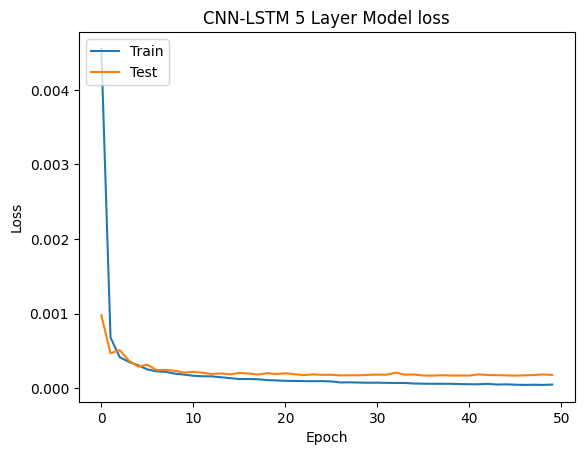

In [137]:
plt.plot(CL_5l.history['loss'])
plt.plot(CL_5l.history['val_loss'])
plt.title('CNN-LSTM 5 Layer Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Transformer

## 1 Block

In [126]:
class MultiHeadAttention(Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = Dense(d_model)
        self.wk = Dense(d_model)
        self.wv = Dense(d_model)

        self.dense = Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        output = tf.matmul(attention_weights, v)
        output = tf.transpose(output, perm=[0, 2, 1, 3])
        output = tf.reshape(output, (batch_size, -1, self.d_model))
        output = self.dense(output)
        return output

# Transformer Block
class TransformerBlock(Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(d_model, num_heads)
        self.ffn = tf.keras.Sequential([
          Dense(dff, activation='relu'),  # 1st layer: add up to dff dim
          Dense(d_model)  # 2nd layer: reduce back to d_model(origin) dim
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, x, training):
        attn_output = self.att(x, x, x)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
        return out2

def build_model(input_shape, d_model, num_heads, dff, rate,layers=1):
    inputs = Input(shape=(input_shape,))
    x = Dense(d_model)(inputs)

    for i in range(layers):
        x = TransformerBlock(d_model, num_heads, dff, rate)(x, training=True)

    outputs = Dense(1)(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [127]:
K.clear_session()

model = build_model(28, 128, 8, 512, 0.1)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3712      
_________________________________________________________________
transformer_block (Transform (None, None, 128)         198272    
_________________________________________________________________
dense_10 (Dense)             (None, None, 1)           129       
Total params: 202,113
Trainable params: 202,113
Non-trainable params: 0
_________________________________________________________________


In [128]:
start_time = time.time()

Trans = model.fit(X_train, y_train, epochs=50, batch_size=256,validation_data=(X_test, y_test))

end_time = time.time()

Epoch 1/50
274/274 [==============================] - 13s 41ms/step - loss: 0.1618 - val_loss: 0.0064
Epoch 2/50
274/274 [==============================] - 11s 40ms/step - loss: 0.0045 - val_loss: 0.0034
Epoch 3/50
274/274 [==============================] - 11s 40ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 4/50
274/274 [==============================] - 11s 40ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 5/50
274/274 [==============================] - 11s 40ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 6/50
274/274 [==============================] - 11s 40ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 7/50
274/274 [==============================] - 11s 40ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 8/50
274/274 [==============================] - 11s 39ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 9/50
274/274 [==============================] - 11s 40ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 10/50
274/274 [==============================] - 11s 40ms/step - loss: 0.001

In [130]:
exetime_Trans_1l = end_time-start_time
exetime_Trans_1l

547.549188375473

In [131]:
test_loss_Trans_1l = model.evaluate(X_test, y_test)
test_loss_Trans_1l

938/938 [==============================] - 3s 3ms/step - loss: 6.3597e-04


0.0006359656108543277

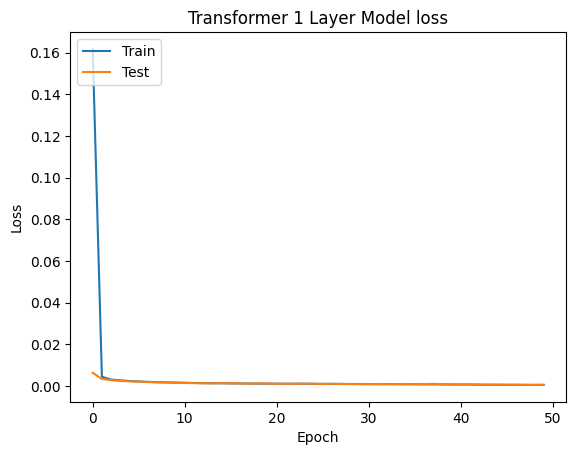

In [138]:
plt.plot(Trans.history['loss'])
plt.plot(Trans.history['val_loss'])
plt.title('Transformer 1 Layer Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 3 Block

In [139]:
class MultiHeadAttention(Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = Dense(d_model)
        self.wk = Dense(d_model)
        self.wv = Dense(d_model)

        self.dense = Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        output = tf.matmul(attention_weights, v)
        output = tf.transpose(output, perm=[0, 2, 1, 3])
        output = tf.reshape(output, (batch_size, -1, self.d_model))
        output = self.dense(output)
        return output

class TransformerBlock(Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(d_model, num_heads)
        self.ffn = tf.keras.Sequential([
          Dense(dff, activation='relu'),
          Dense(d_model)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, x, training):
        attn_output = self.att(x, x, x)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
        return out2

def build_model(input_shape, d_model, num_heads, dff, rate,layers=3):
    inputs = Input(shape=(input_shape,))
    x = Dense(d_model)(inputs)

    for i in range(layers):
        x = TransformerBlock(d_model, num_heads, dff, rate)(x, training=True)

    outputs = Dense(1)(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [140]:
K.clear_session()

model = build_model(28, 128, 8, 512, 0.1)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28)]              0         
_________________________________________________________________
dense (Dense)                (None, 128)               3712      
_________________________________________________________________
transformer_block (Transform (None, None, 128)         198272    
_________________________________________________________________
transformer_block_1 (Transfo (None, None, 128)         198272    
_________________________________________________________________
transformer_block_2 (Transfo (None, None, 128)         198272    
_________________________________________________________________
dense_19 (Dense)             (None, None, 1)           129       
Total params: 598,657
Trainable params: 598,657
Non-trainable params: 0
_______________________________________________________

In [141]:
start_time = time.time()

Trans_3l = model.fit(X_train, y_train, epochs=50, batch_size=256,validation_data=(X_test, y_test))

end_time = time.time()

Epoch 1/50
274/274 [==============================] - 74s 260ms/step - loss: 0.3969 - val_loss: 0.0088
Epoch 2/50
274/274 [==============================] - 71s 258ms/step - loss: 0.0056 - val_loss: 0.0040
Epoch 3/50
274/274 [==============================] - 71s 259ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 4/50
274/274 [==============================] - 71s 258ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 5/50
274/274 [==============================] - 71s 259ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 6/50
274/274 [==============================] - 71s 259ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 7/50
274/274 [==============================] - 71s 261ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 8/50
274/274 [==============================] - 72s 262ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 9/50
274/274 [==============================] - 71s 260ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/50
274/274 [==============================] - 71s 259ms/step - l

In [142]:
exetime_Trans_3l = end_time-start_time
exetime_Trans_3l

3541.8487074375153

In [143]:
test_loss_Trans_3l = model.evaluate(X_test, y_test)
test_loss_Trans_3l

938/938 [==============================] - 7s 7ms/step - loss: 6.5099e-04


0.0006509923259727657

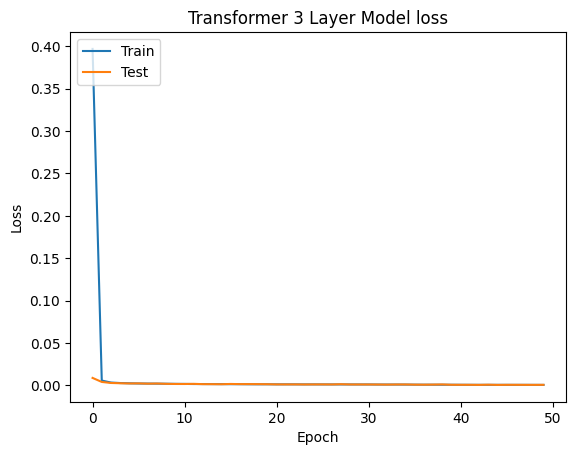

In [144]:
plt.plot(Trans_3l.history['loss'])
plt.plot(Trans_3l.history['val_loss'])
plt.title('Transformer 3 Layer Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 5 Block

In [145]:
class MultiHeadAttention(Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = Dense(d_model)
        self.wk = Dense(d_model)
        self.wv = Dense(d_model)

        self.dense = Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        output = tf.matmul(attention_weights, v)
        output = tf.transpose(output, perm=[0, 2, 1, 3])
        output = tf.reshape(output, (batch_size, -1, self.d_model))
        output = self.dense(output)
        return output

class TransformerBlock(Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(d_model, num_heads)
        self.ffn = tf.keras.Sequential([
          Dense(dff, activation='relu'),
          Dense(d_model)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, x, training):
        attn_output = self.att(x, x, x)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
        return out2

def build_model(input_shape, d_model, num_heads, dff, rate,layers=5):
    inputs = Input(shape=(input_shape,))
    x = Dense(d_model)(inputs)

    for i in range(layers):
        x = TransformerBlock(d_model, num_heads, dff, rate)(x, training=True)

    outputs = Dense(1)(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [146]:
K.clear_session()

model = build_model(28, 128, 8, 512, 0.1,layers=5)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28)]              0         
_________________________________________________________________
dense (Dense)                (None, 128)               3712      
_________________________________________________________________
transformer_block (Transform (None, None, 128)         198272    
_________________________________________________________________
transformer_block_1 (Transfo (None, None, 128)         198272    
_________________________________________________________________
transformer_block_2 (Transfo (None, None, 128)         198272    
_________________________________________________________________
transformer_block_3 (Transfo (None, None, 128)         198272    
_________________________________________________________________
transformer_block_4 (Transfo (None, None, 128)         198272

In [147]:
start_time = time.time()

Trans_5l = model.fit(X_train, y_train, epochs=50, batch_size=256,validation_data=(X_test, y_test))

end_time = time.time()

Epoch 1/50
274/274 [==============================] - 136s 479ms/step - loss: 0.2898 - val_loss: 0.0089
Epoch 2/50
274/274 [==============================] - 130s 476ms/step - loss: 0.0074 - val_loss: 0.0067
Epoch 3/50
274/274 [==============================] - 130s 476ms/step - loss: 0.0038 - val_loss: 0.0030
Epoch 4/50
274/274 [==============================] - 131s 479ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 5/50
274/274 [==============================] - 131s 478ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 6/50
274/274 [==============================] - 131s 479ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 7/50
274/274 [==============================] - 131s 478ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 8/50
274/274 [==============================] - 131s 477ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 9/50
274/274 [==============================] - 131s 479ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 10/50
274/274 [==============================] - 131s 478m

In [148]:
exetime_Trans_5l = end_time-start_time
exetime_Trans_5l

6529.091120958328

In [149]:
test_loss_Trans_5l = model.evaluate(X_test, y_test)
test_loss_Trans_5l

938/938 [==============================] - 10s 11ms/step - loss: 6.1087e-04


0.0006108742672950029

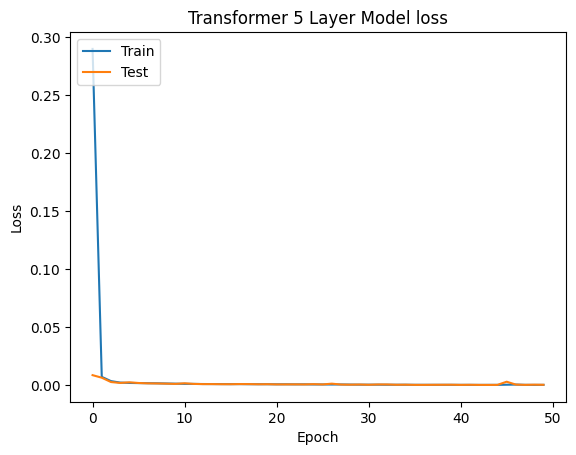

In [150]:
plt.plot(Trans_5l.history['loss'])
plt.plot(Trans_5l.history['val_loss'])
plt.title('Transformer 5 Layer Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot all

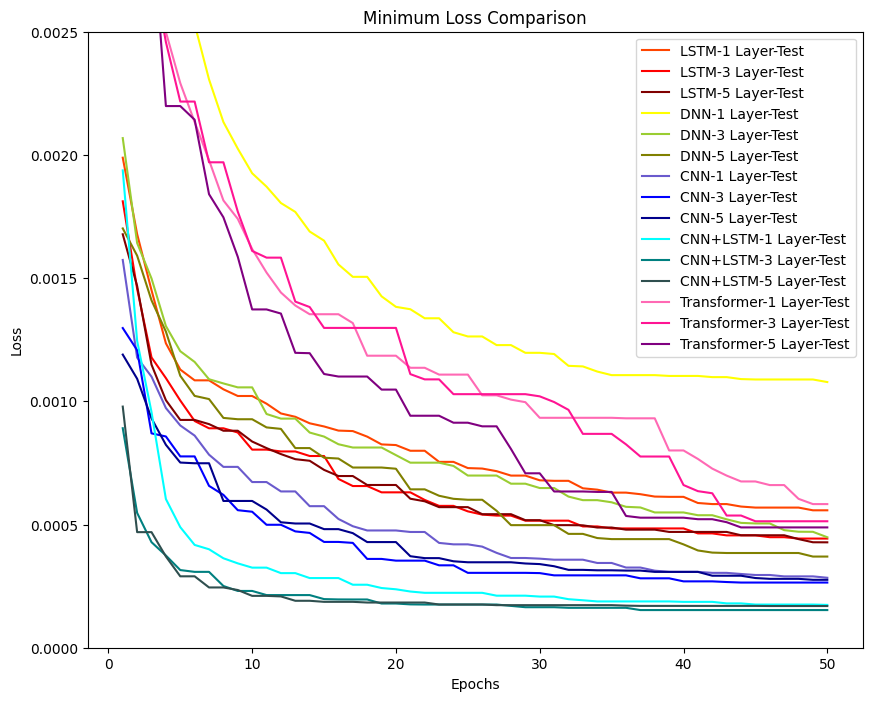

In [174]:
plt.figure(figsize=(10, 8))

plt.title('Minimum Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.ylim(0, 0.0025)

epochs = range(1, 51)

#plt.plot(epochs, np.minimum.accumulate(LSTM_1l.history['loss']), 'orangered', linestyle='--', label='LSTM-1 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(LSTM_1l.history['val_loss']), 'orangered', label='LSTM-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(LSTM_3l.history['loss']), 'red', linestyle='--', label='LSTM-3 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(LSTM_3l.history['val_loss']), 'red', label='LSTM-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(LSTM_5l.history['loss']), 'maroon', linestyle='--', label='LSTM-5 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(LSTM_5l.history['val_loss']), 'maroon', label='LSTM-5 Layer-Test')

#plt.plot(epochs, np.minimum.accumulate(DNN_1l.history['loss']), 'yellow', linestyle='--', label='DNN-1 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(DNN_1l.history['val_loss']), 'yellow', label='DNN-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(DNN_3l.history['loss']), 'yellowgreen', linestyle='--', label='DNN-3 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(DNN_3l.history['val_loss']), 'yellowgreen', label='DNN-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(DNN_5l.history['loss']), 'olive', linestyle='--', label='DNN-5 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(DNN_5l.history['val_loss']), 'olive', label='DNN-5 Layer-Test')

#plt.plot(epochs, np.minimum.accumulate(CNN_1l.history['loss']), 'slateblue', linestyle='--', label='CNN-1 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(CNN_1l.history['val_loss']), 'slateblue', label='CNN-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(CNN_3l.history['loss']), 'blue', linestyle='--', label='CNN-3 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(CNN_3l.history['val_loss']), 'blue', label='CNN-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(CNN_5l.history['loss']), 'darkblue', linestyle='--', label='CNN-5 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(CNN_5l.history['val_loss']), 'darkblue', label='CNN-5 Layer-Test')

#plt.plot(epochs, np.minimum.accumulate(CL_1l.history['loss']), 'aqua', linestyle='--', label='CNN+LSTM-1 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(CL_1l.history['val_loss']), 'aqua', label='CNN+LSTM-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(CL_3l.history['loss']), 'teal', linestyle='--', label='CNN+LSTM-3 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(CL_3l.history['val_loss']), 'teal', label='CNN+LSTM-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(CL_5l.history['loss']), 'darkslategrey', linestyle='--', label='CNN+LSTM-5 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(CL_5l.history['val_loss']), 'darkslategrey', label='CNN+LSTM-5 Layer-Test')

#plt.plot(epochs, np.minimum.accumulate(Trans.history['loss']), 'hotpink', linestyle='--', label='Transformer-1 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(Trans.history['val_loss']), 'hotpink', label='Transformer-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(Trans_3l.history['loss']), 'deeppink', linestyle='--', label='Transformer-3 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(Trans_3l.history['val_loss']), 'deeppink', label='Transformer-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(Trans_5l.history['loss']), 'purple', linestyle='--', label='Transformer-5 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(Trans_5l.history['val_loss']), 'purple', label='Transformer-5 Layer-Test')

plt.legend(loc='upper right')
plt.show()

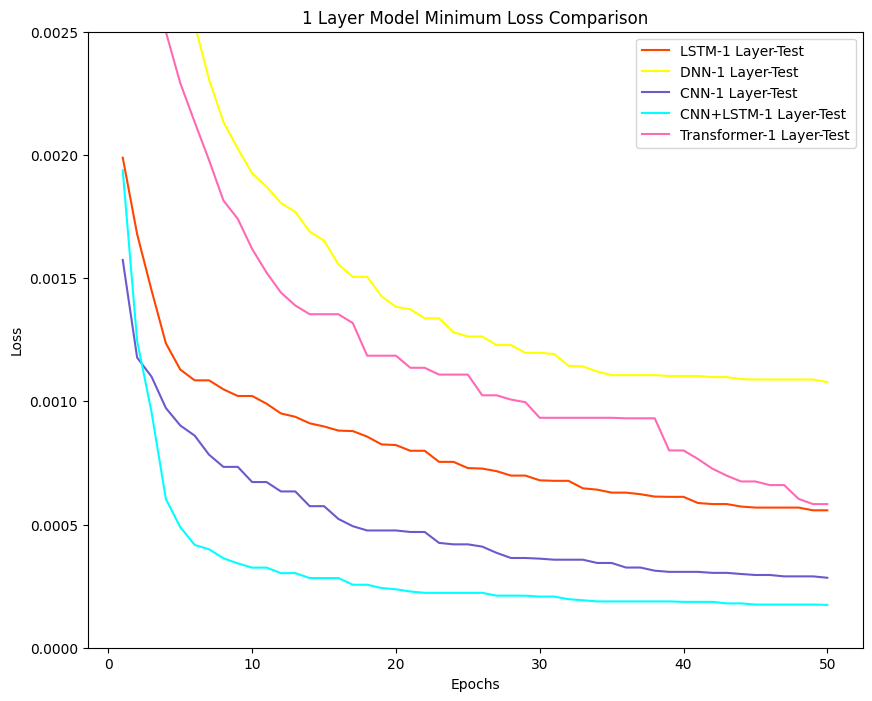

In [175]:
plt.figure(figsize=(10, 8))

plt.title('1 Layer Model Minimum Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.ylim(0, 0.0025)

epochs = range(1, 51)

#plt.plot(epochs, np.minimum.accumulate(LSTM_1l.history['loss']), 'orangered', linestyle='--', label='LSTM-1 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(LSTM_1l.history['val_loss']), 'orangered', label='LSTM-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(LSTM_3l.history['loss']), 'red', linestyle='--', label='LSTM-3 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(LSTM_3l.history['val_loss']), 'red', label='LSTM-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(LSTM_5l.history['loss']), 'maroon', linestyle='--', label='LSTM-5 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(LSTM_5l.history['val_loss']), 'maroon', label='LSTM-5 Layer-Test')

#plt.plot(epochs, np.minimum.accumulate(DNN_1l.history['loss']), 'yellow', linestyle='--', label='DNN-1 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(DNN_1l.history['val_loss']), 'yellow', label='DNN-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(DNN_3l.history['loss']), 'yellowgreen', linestyle='--', label='DNN-3 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(DNN_3l.history['val_loss']), 'yellowgreen', label='DNN-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(DNN_5l.history['loss']), 'olive', linestyle='--', label='DNN-5 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(DNN_5l.history['val_loss']), 'olive', label='DNN-5 Layer-Test')

#plt.plot(epochs, np.minimum.accumulate(CNN_1l.history['loss']), 'slateblue', linestyle='--', label='CNN-1 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(CNN_1l.history['val_loss']), 'slateblue', label='CNN-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(CNN_3l.history['loss']), 'blue', linestyle='--', label='CNN-3 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(CNN_3l.history['val_loss']), 'blue', label='CNN-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(CNN_5l.history['loss']), 'darkblue', linestyle='--', label='CNN-5 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(CNN_5l.history['val_loss']), 'darkblue', label='CNN-5 Layer-Test')

#plt.plot(epochs, np.minimum.accumulate(CL_1l.history['loss']), 'aqua', linestyle='--', label='CNN+LSTM-1 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(CL_1l.history['val_loss']), 'aqua', label='CNN+LSTM-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(CL_3l.history['loss']), 'teal', linestyle='--', label='CNN+LSTM-3 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(CL_3l.history['val_loss']), 'teal', label='CNN+LSTM-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(CL_5l.history['loss']), 'darkslategrey', linestyle='--', label='CNN+LSTM-5 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(CL_5l.history['val_loss']), 'darkslategrey', label='CNN+LSTM-5 Layer-Test')

#plt.plot(epochs, np.minimum.accumulate(Trans.history['loss']), 'hotpink', linestyle='--', label='Transformer-1 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(Trans.history['val_loss']), 'hotpink', label='Transformer-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(Trans_3l.history['loss']), 'deeppink', linestyle='--', label='Transformer-3 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(Trans_3l.history['val_loss']), 'deeppink', label='Transformer-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(Trans_5l.history['loss']), 'purple', linestyle='--', label='Transformer-5 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(Trans_5l.history['val_loss']), 'purple', label='Transformer-5 Layer-Test')

plt.legend(loc='upper right')
plt.show()

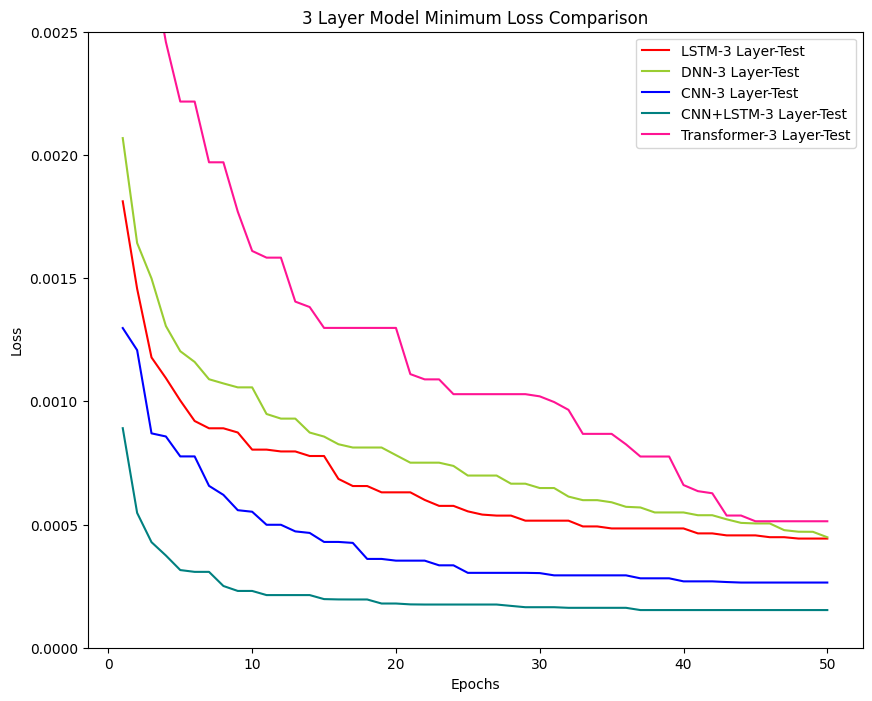

In [176]:
plt.figure(figsize=(10, 8))

plt.title('3 Layer Model Minimum Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.ylim(0, 0.0025)

epochs = range(1, 51)

#plt.plot(epochs, np.minimum.accumulate(LSTM_1l.history['loss']), 'orangered', linestyle='--', label='LSTM-1 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(LSTM_1l.history['val_loss']), 'orangered', label='LSTM-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(LSTM_3l.history['loss']), 'red', linestyle='--', label='LSTM-3 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(LSTM_3l.history['val_loss']), 'red', label='LSTM-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(LSTM_5l.history['loss']), 'maroon', linestyle='--', label='LSTM-5 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(LSTM_5l.history['val_loss']), 'maroon', label='LSTM-5 Layer-Test')

#plt.plot(epochs, np.minimum.accumulate(DNN_1l.history['loss']), 'yellow', linestyle='--', label='DNN-1 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(DNN_1l.history['val_loss']), 'yellow', label='DNN-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(DNN_3l.history['loss']), 'yellowgreen', linestyle='--', label='DNN-3 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(DNN_3l.history['val_loss']), 'yellowgreen', label='DNN-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(DNN_5l.history['loss']), 'olive', linestyle='--', label='DNN-5 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(DNN_5l.history['val_loss']), 'olive', label='DNN-5 Layer-Test')

#plt.plot(epochs, np.minimum.accumulate(CNN_1l.history['loss']), 'slateblue', linestyle='--', label='CNN-1 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(CNN_1l.history['val_loss']), 'slateblue', label='CNN-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(CNN_3l.history['loss']), 'blue', linestyle='--', label='CNN-3 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(CNN_3l.history['val_loss']), 'blue', label='CNN-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(CNN_5l.history['loss']), 'darkblue', linestyle='--', label='CNN-5 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(CNN_5l.history['val_loss']), 'darkblue', label='CNN-5 Layer-Test')

#plt.plot(epochs, np.minimum.accumulate(CL_1l.history['loss']), 'aqua', linestyle='--', label='CNN+LSTM-1 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(CL_1l.history['val_loss']), 'aqua', label='CNN+LSTM-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(CL_3l.history['loss']), 'teal', linestyle='--', label='CNN+LSTM-3 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(CL_3l.history['val_loss']), 'teal', label='CNN+LSTM-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(CL_5l.history['loss']), 'darkslategrey', linestyle='--', label='CNN+LSTM-5 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(CL_5l.history['val_loss']), 'darkslategrey', label='CNN+LSTM-5 Layer-Test')

#plt.plot(epochs, np.minimum.accumulate(Trans.history['loss']), 'hotpink', linestyle='--', label='Transformer-1 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(Trans.history['val_loss']), 'hotpink', label='Transformer-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(Trans_3l.history['loss']), 'deeppink', linestyle='--', label='Transformer-3 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(Trans_3l.history['val_loss']), 'deeppink', label='Transformer-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(Trans_5l.history['loss']), 'purple', linestyle='--', label='Transformer-5 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(Trans_5l.history['val_loss']), 'purple', label='Transformer-5 Layer-Test')

plt.legend(loc='upper right')
plt.show()

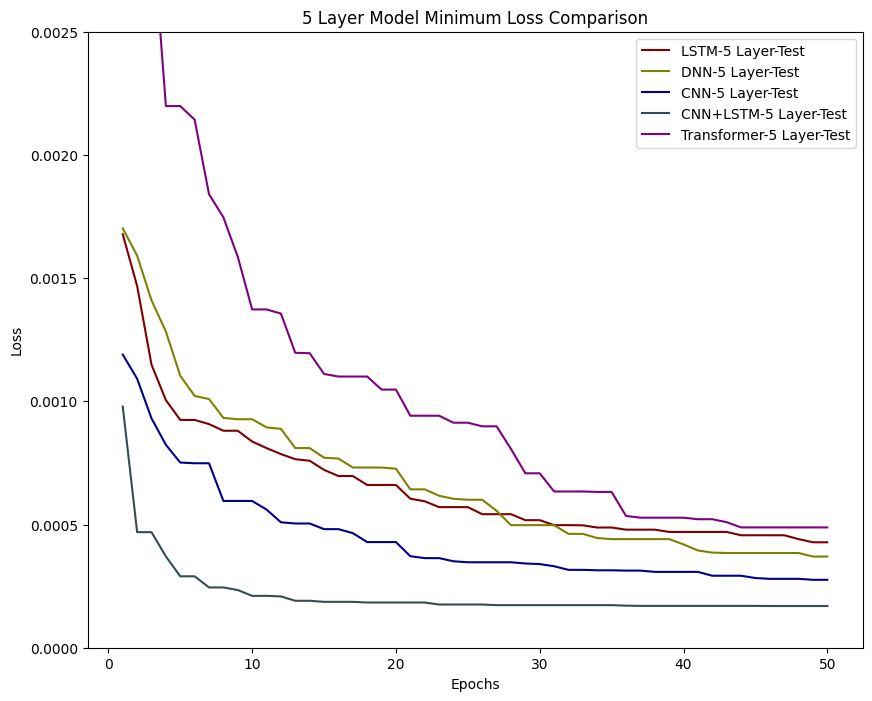

In [177]:
plt.figure(figsize=(10, 8))

plt.title('5 Layer Model Minimum Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.ylim(0, 0.0025)

epochs = range(1, 51)

#plt.plot(epochs, np.minimum.accumulate(LSTM_1l.history['loss']), 'orangered', linestyle='--', label='LSTM-1 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(LSTM_1l.history['val_loss']), 'orangered', label='LSTM-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(LSTM_3l.history['loss']), 'red', linestyle='--', label='LSTM-3 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(LSTM_3l.history['val_loss']), 'red', label='LSTM-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(LSTM_5l.history['loss']), 'maroon', linestyle='--', label='LSTM-5 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(LSTM_5l.history['val_loss']), 'maroon', label='LSTM-5 Layer-Test')

#plt.plot(epochs, np.minimum.accumulate(DNN_1l.history['loss']), 'yellow', linestyle='--', label='DNN-1 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(DNN_1l.history['val_loss']), 'yellow', label='DNN-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(DNN_3l.history['loss']), 'yellowgreen', linestyle='--', label='DNN-3 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(DNN_3l.history['val_loss']), 'yellowgreen', label='DNN-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(DNN_5l.history['loss']), 'olive', linestyle='--', label='DNN-5 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(DNN_5l.history['val_loss']), 'olive', label='DNN-5 Layer-Test')

#plt.plot(epochs, np.minimum.accumulate(CNN_1l.history['loss']), 'slateblue', linestyle='--', label='CNN-1 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(CNN_1l.history['val_loss']), 'slateblue', label='CNN-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(CNN_3l.history['loss']), 'blue', linestyle='--', label='CNN-3 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(CNN_3l.history['val_loss']), 'blue', label='CNN-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(CNN_5l.history['loss']), 'darkblue', linestyle='--', label='CNN-5 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(CNN_5l.history['val_loss']), 'darkblue', label='CNN-5 Layer-Test')

#plt.plot(epochs, np.minimum.accumulate(CL_1l.history['loss']), 'aqua', linestyle='--', label='CNN+LSTM-1 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(CL_1l.history['val_loss']), 'aqua', label='CNN+LSTM-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(CL_3l.history['loss']), 'teal', linestyle='--', label='CNN+LSTM-3 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(CL_3l.history['val_loss']), 'teal', label='CNN+LSTM-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(CL_5l.history['loss']), 'darkslategrey', linestyle='--', label='CNN+LSTM-5 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(CL_5l.history['val_loss']), 'darkslategrey', label='CNN+LSTM-5 Layer-Test')

#plt.plot(epochs, np.minimum.accumulate(Trans.history['loss']), 'hotpink', linestyle='--', label='Transformer-1 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(Trans.history['val_loss']), 'hotpink', label='Transformer-1 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(Trans_3l.history['loss']), 'deeppink', linestyle='--', label='Transformer-3 Layer-Train')
#plt.plot(epochs, np.minimum.accumulate(Trans_3l.history['val_loss']), 'deeppink', label='Transformer-3 Layer-Test')
#plt.plot(epochs, np.minimum.accumulate(Trans_5l.history['loss']), 'purple', linestyle='--', label='Transformer-5 Layer-Train')
plt.plot(epochs, np.minimum.accumulate(Trans_5l.history['val_loss']), 'purple', label='Transformer-5 Layer-Test')

plt.legend(loc='upper right')
plt.show()